In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from scipy import stats
import datetime

warnings.filterwarnings('ignore')
%matplotlib inline

In [97]:
# 한글 깨짐
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/preprocessing_data.csv")
df = pd.read_csv("preprocessing_data.csv")
df

,title,published_at,published_time,published_year,published_month,published_day,month_upload_count,duration,view_count,likes,dislikes,comment_count,description,tags,comments
0,100kg 20회 실화?!?? 아이템 착용,2021-05-31,12,2021,5,31,4,37,973,25.0,2.0,12.0,아이템전....,"벤치프레스,스트렝스,경돼 벤치프레스,100kg,벤치프레스100kg,benchpres...","['형님영상보고 5X5X5 루틴하고있는데\n5,5,5가 효과가 더있나요 아니면 많이..."
1,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30,22,2021,5,30,4,43,1487,33.0,0.0,21.0,출근 전 벤치프레스,"벤치프레스,Benchpress,스트렝스,경돼",['손바닥 전체적으로 미시나요?\n자신만의 포인트좀 공유부탁드려요.\n 상당히 안정...
2,출근 전 벤치프레스 100kg,2021-05-26,22,2021,5,26,4,42,2042,31.0,3.0,17.0,NaN,"shorts,short,벤치프레스,직장인","[""'진짜 운동하는 직장인'"", '쌀돼 경돼 갓돼', '요새는 유도 안하세요??',..."
3,궁금했던 것 물어보면 딱 좋은 타이밍!,2021-05-14,2,2021,5,14,4,210,2011,67.0,2.0,16.0,여러분 안녕하세요 경돼입니다.\r\n\r\n모두\r\n\r\nBe more posi...,"경돼,스트렝스,훈련,운동vlog,운동유튜버,워라밸,마왕,마선호,경돼 마선호,브이로그","['진짜 멋있다 ㅎㅎ', '도대체이형은 몸이 왜 변하지않는거지', '경돼 가슴이 진..."
4,비아냥 속에서도 묵묵히 최선을 다할 것.,2021-04-25,2,2021,4,25,1,13,5501,127.0,7.0,64.0,벚꽃슈레딩 Day25,"shorts,짧은동영상,경돼,다이어트",['비아냥이라니요. 지금도\n잘 하시고 있는데.. 누구 탓할\n필요도 없습니다. 본...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,All round Workouts (전신운동) 07,2016-05-16,9,2016,5,16,13,461,464,11.0,0.0,19.0,Sit back and Enjoy this video\r\nSubscribe & t...,"데드리프트,전신운동,all round workouts,workouts,all rou...","['등 운동 진짜 많이 하네', '갓돼님 영상 정주행중입니다 ㅋㅋ', '영상 재밌네..."
594,"SixpackShortCuts (스쿼트, 어깨운동, 일상) 05",2016-05-12,14,2016,5,12,13,346,1127,16.0,1.0,5.0,"Some talk & Workouts\r\nSquats, Shoulder press!","스쿼트,숄더프레스,밀리터리프레스,어깨운동,하체운동,대학교,경희대학교,일상","['처음 인사할때 빤쓰 차림로 찍었네 ㅋㅋㅋㅋㅋ', '와우.. 저는 Tom의 제자입..."
595,Body transformation without diet in 3months,2016-05-09,6,2016,5,9,13,209,12163,74.0,6.0,21.0,3 months natural Body transformation without d...,"body transformation,3개월,몸변화,다이어트","['저 젊다...지금은 아저씨 뻘인데ㅋㅋ', '경돼 1화부터 다시 정주행중!!', ..."
596,스모데드리프트 (Sumo Deadlifts) 02,2016-05-08,13,2016,5,8,13,214,3218,29.0,0.0,12.0,스모데드리프트 영상,"스모데드리프트,등운동,유도,3대운동,3대중량","['지린다.....', '자세 제대로 찍어주지도않고 뭐지', '풋풋하네요ㅋㅋ', '..."


In [13]:
df.rename(columns = {'published_at':'date',
                     'published_year':'year',
                     'published_month':'month',
                    'published_day':'day'},inplace = True)
df#598,15
df.isnull().sum()

title                 0
date                  0
published_time        0
year                  0
month                 0
day                   0
month_upload_count    0
duration              0
view_count            0
likes                 1
dislikes              1
comment_count         1
description           2
tags                  7
comments              0
dtype: int64

# 데이터 전처리

In [14]:
#데이터 전처리
#iloc 는 숫자형 인덱스만 받아주고 loc는 문자형 인덱스도 받아줌 > ?
#tags,description,comments 삭제
df2 = df.drop(["tags","description","comments"],axis =1)
#1)경돼님이 댓글기능 막으셔서 좋아요 및 싫어요 NA처리 행 제거
df2 = df2.dropna(axis=0)
df2.shape#597,12 > 댓글 막은 1개의 행 삭제

(597, 12)

# 이상치 처리

In [15]:
#이상치 처리
# 4분 위수 1, 3분위 수 구하기
quatile_25 = np.percentile(df2["view_count"], 25)
quatile_75 = np.percentile(df2["view_count"], 75)

# iqr
iqr = quatile_75 - quatile_25
# 이상치 처리 기준
highest = quatile_75 + (1.5 * iqr)

In [16]:
prep_df = df2[df2["view_count"] <= highest].reset_index(drop = True)

# 상관관계 확인

In [17]:
#상관관계가 높은 변수들을 통해서 total_interest 생성
df2['total_interest'] = df2['likes']+df2['dislikes']+df2['comment_count']
prep_df['total_interest'] = prep_df['likes']+prep_df['dislikes']+prep_df['comment_count']

<AxesSubplot:>

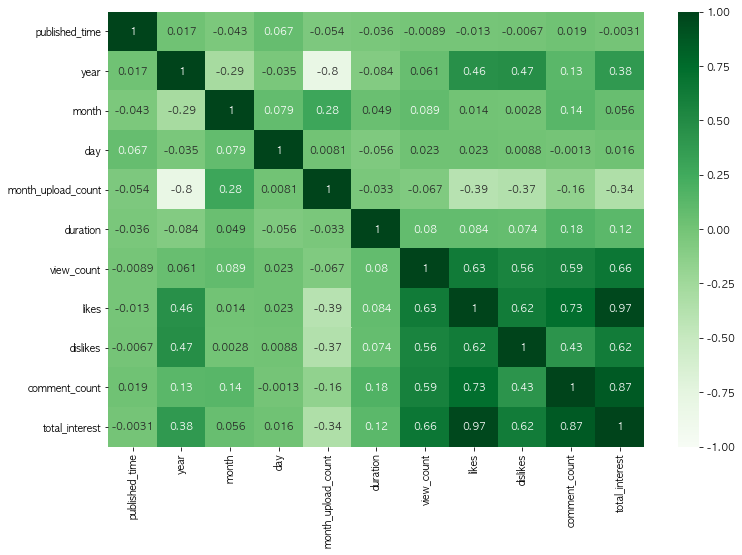

In [18]:
#상관관계 시각화
a = prep_df.drop(['title','date'],axis = 1).corr()
#plt.figure(figsize = (12,8))
#sns.heatmap(a,vmin=-1,vmax=1,annot = True)
plt.rcParams["figure.figsize"] = (12,8)
sns.heatmap(a,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
)

In [19]:
#상관관계 vies_count & month_upload_count 유의미지 않다. 
#그러나 month_upload_count의 행구성을 주의해서 파악해야한다.
#month별로 카운트되므로 비교할 변수도 month로 묶어줘야 정확한 상관관계 파악 가능.
#도민님의 분석에서 업로드횟수가 4회미만의 집단들에서는 차이가 나타나지 않는 이유인듯하다.
stats.pearsonr(prep_df.view_count,prep_df.month_upload_count)
#p-value 0.05이상

(-0.06685660923839326, 0.11935020524549375)

In [20]:
#month 그룹핑
mt_upload_ct = prep_df.loc[:,['year','month','month_upload_count']].groupby(['year','month']).mean().reset_index()
prep_df2 = prep_df.drop(['title','date','published_time','day','month_upload_count','likes','dislikes','comment_count','duration'],axis =1)
a1 = prep_df2.groupby(['year','month']).agg(['mean','sum']).reset_index()
a1.columns = ['year','month','mt_mean_view','mt_total_view','mt_mean_interest','mt_total_interest']
a1
#a1.drop(['aa','bb'],axis=1,inplace = True)

,year,month,mt_mean_view,mt_total_view,mt_mean_interest,mt_total_interest
0,2016,5,3277.846154,42612,46.769231,608.0
1,2016,6,2939.692308,76432,38.615385,1004.0
2,2016,7,4425.789474,84090,48.684211,925.0
3,2016,8,8541.647059,145208,87.823529,1493.0
4,2016,9,7133.125000,114130,85.062500,1361.0
5,2016,10,6605.769231,85875,116.153846,1510.0
6,2016,11,7863.722222,141547,123.333333,2220.0
7,2016,12,4512.384615,58661,135.692308,1764.0
8,2017,1,4883.300000,48833,125.400000,1254.0
9,2017,2,5684.933333,85274,108.466667,1627.0


In [21]:
#month 데이터
a2 = pd.concat([a1,mt_upload_ct['month_upload_count']],axis =1)
a2

,year,month,mt_mean_view,mt_total_view,mt_mean_interest,mt_total_interest,month_upload_count
0,2016,5,3277.846154,42612,46.769231,608.0,13
1,2016,6,2939.692308,76432,38.615385,1004.0,26
2,2016,7,4425.789474,84090,48.684211,925.0,23
3,2016,8,8541.647059,145208,87.823529,1493.0,20
4,2016,9,7133.125000,114130,85.062500,1361.0,19
5,2016,10,6605.769231,85875,116.153846,1510.0,13
6,2016,11,7863.722222,141547,123.333333,2220.0,18
7,2016,12,4512.384615,58661,135.692308,1764.0,14
8,2017,1,4883.300000,48833,125.400000,1254.0,11
9,2017,2,5684.933333,85274,108.466667,1627.0,17


<AxesSubplot:>

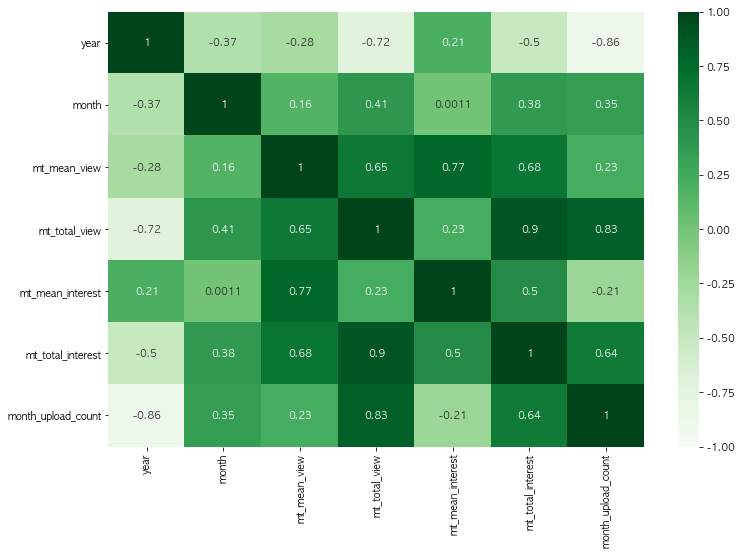

In [22]:
#month데이터 상관관계 분석
b = a2.corr()
plt.rcParams["figure.figsize"] = (12,8)
sns.heatmap(b,
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
)

In [23]:
#피어슨 상관분석 진행
#month_upload_count와 month_mean_view 약한 양의 상관관계
stats.pearsonr(a2.month_upload_count,a2.mt_mean_view)

(0.2318736008427359, 0.07987500132428729)

In [24]:
#month_upload_count와 month_total_view 유의함. 강한 양의 상관관계
stats.pearsonr(a2.month_upload_count,a2.mt_total_view)

(0.8275746881929565, 1.153587544688558e-15)

In [25]:
#영상업로드와 total_interest 또한 유의함. 양의 상관관계
stats.pearsonr(a2.month_upload_count,a2.mt_total_interest)

(0.6371689147729611, 7.544619698540239e-08)

In [26]:
a2['date'] = a2['year'].astype(str)+ '-' + a2['month'].astype(str)
#pd.to_datetime(a2['date'],'%Y%m')
#'-'.join(a2['year'],a2['month'])
a2['date']

0      2016-5
1      2016-6
2      2016-7
3      2016-8
4      2016-9
5     2016-10
6     2016-11
7     2016-12
8      2017-1
9      2017-2
10     2017-3
11     2017-4
12     2017-5
13     2017-6
14     2017-7
15     2017-8
16     2017-9
17    2017-10
18    2017-11
19    2017-12
20     2018-1
21     2018-2
22     2018-3
23     2018-4
24     2018-5
25     2018-6
26     2018-7
27     2018-8
28     2018-9
29    2018-10
30    2018-11
31    2018-12
32     2019-1
33     2019-2
34     2019-3
35     2019-4
36     2019-5
37     2019-6
38     2019-7
39     2019-8
40     2019-9
41    2019-10
42    2019-11
43    2019-12
44     2020-1
45     2020-2
46     2020-3
47     2020-4
48     2020-5
49     2020-6
50     2020-7
51     2020-8
52     2020-9
53     2021-1
54     2021-2
55     2021-3
56     2021-4
57     2021-5
Name: date, dtype: object

In [82]:
year_upload_ct = a2.groupby("year")["month_upload_count"].agg("sum").reset_index()
year_upload_ct.rename(columns = {'year' : 'year','month_upload_count' : 'year_upload_ct'},inplace = True)
year_upload_ct

,year,year_upload_ct
0,2016,146
1,2017,186
2,2018,143
3,2019,80
4,2020,28
5,2021,15


# 연도별 시각화

<AxesSubplot:xlabel='year', ylabel='year_upload_ct'>

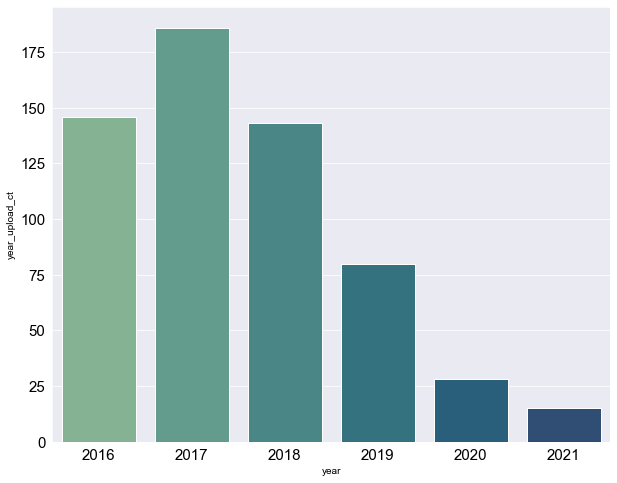

In [83]:
#연도별 업로드 횟수
plt.figure(figsize=(10,8))
plt.xticks(color = "black", fontsize = 15)
plt.xlabel("year", color = "black")
plt.yticks(color = "black", fontsize = 15)
plt.ylabel("yr_mean_view", color = "black")
sns.barplot(x = "year", y = "year_upload_ct", data=year_upload_ct, palette = 'crest')

# 월별 시각화

<AxesSubplot:xlabel='date', ylabel='mt_total_view'>

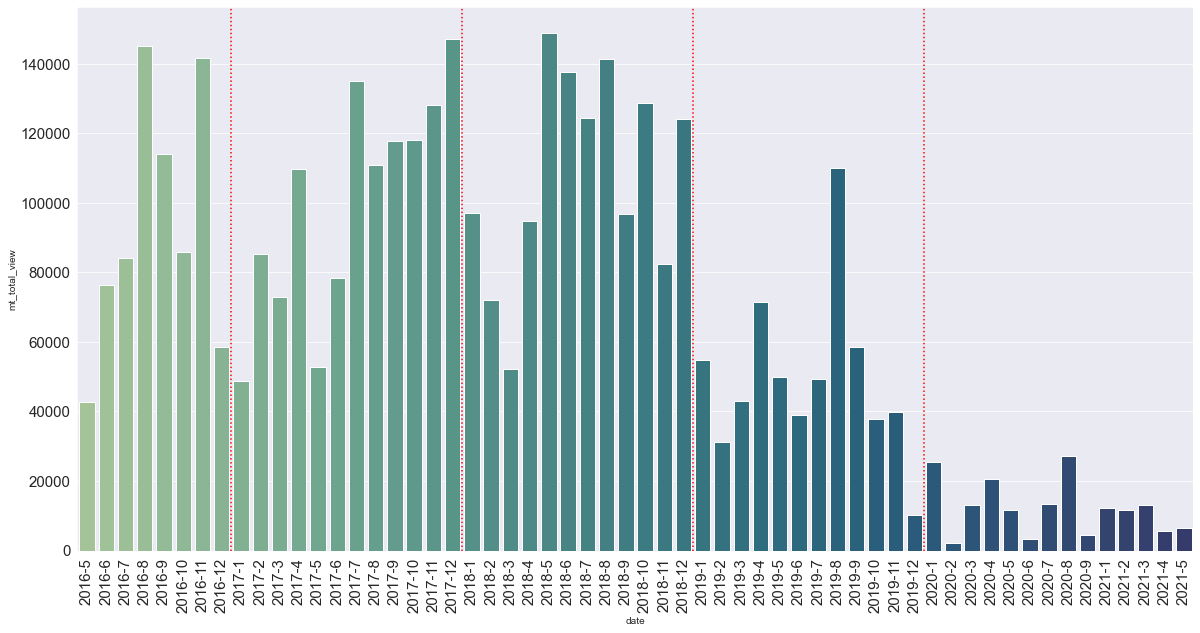

In [60]:
#월별 데이터 시각화
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xticks(fontsize = 15,rotation = 90)
plt.xlabel("date")
plt.yticks(fontsize = 15)
#plt.ylabel("mt_total_view", color = "black")
plt.axvline(x=7.5, color='r', linestyle=':')
plt.axvline(x=19.5, color='r', linestyle=':')
plt.axvline(x=31.5, color='r', linestyle=':')
plt.axvline(x=43.5, color='r', linestyle=':')

sns.barplot(x = 'date', y = "mt_total_view", data=a2,palette=("crest"))

<AxesSubplot:xlabel='date', ylabel='mt_mean_view'>

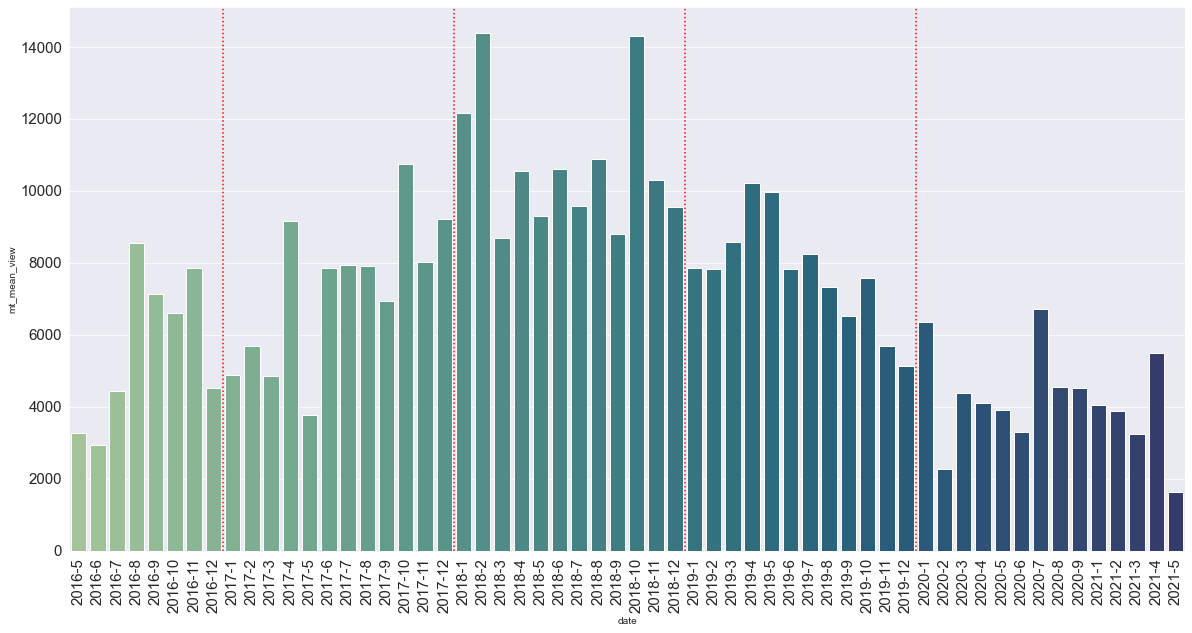

In [61]:
#월별 데이터 시각화
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xticks(fontsize = 15,rotation = 90)
plt.xlabel("date")
plt.yticks(fontsize = 15)
#plt.ylabel("mt_total_view", color = "black")
plt.axvline(x=7.5, color='r', linestyle=':')
plt.axvline(x=19.5, color='r', linestyle=':')
plt.axvline(x=31.5, color='r', linestyle=':')
plt.axvline(x=43.5, color='r', linestyle=':')

sns.barplot(x = 'date', y = "mt_mean_view", data=a2,palette=("crest"))

<AxesSubplot:title={'center':'2018년 이후 유의'}, xlabel='year', ylabel='view_count'>

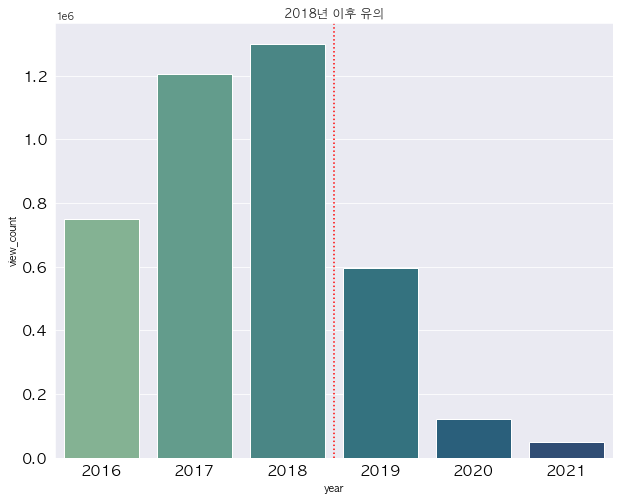

In [99]:
#년도별 view_count 데이터 시각화
year_view_df = prep_df.groupby("year")["view_count"].agg("sum").reset_index()

plt.figure(figsize=(10,8))
plt.xticks(color = "black", fontsize = 15)
plt.xlabel("year", color = "black")
plt.yticks(color = "black", fontsize = 15)
plt.ylabel("yr_mean_view", color = "black")
plt.axvline(x=2.5, color = 'red', linestyle= ':')
plt.title('2018년 이후 유의')
sns.barplot(x = "year", y = "view_count", data=year_view_df, palette = 'crest')

# 컨텐츠 유무에 따른 데이터 확인

In [188]:
##### 컨텐츠 유무의 여부 조회수 확인
def title_pre(x):
    a = x.split("│")
    if len(a) > 1:
        result = a[1] #a[0]이면 제목 추출, a[1]이면 컨텐츠 종류 추출
        result = result.lower()
        result = result.replace("vlog", "브이로그")
        result = re.findall("[가-힣]{1,}", result) # 리스트 형태로 반환
        #{1} 한글자씩 반환, {1,}일시 [] 내용을 하나로 반환, []{1,} []안의 내용 한글자이상 반복될시 반환, []{2,}일시 2글자이상만 반환
        result = " ".join(result) #''.join(리스트)를 이용하면 매개변수로 들어온 ['a', 'b', 'c'] 이런 식의 리스트를 'abc'의 문자열로 합쳐서 반환해주는 함수인 것입니다.

    else:
        result = ""
    return result
    
prep_df["contents"] = prep_df["title"].apply(lambda x: title_pre(x))

In [189]:
prep_df["contents"].value_counts()

                     360
썸머슈레딩                 38
워라밸                   22
윈터슈레딩                 14
썸머스트렝스                 7
                    ... 
파워리프팅 복학생              1
다자이후 후쿠오카 타워 엔 스시      1
대학생활브이로그               1
여성 게스트                 1
새벽반고고씽                 1
Name: contents, Length: 84, dtype: int64

In [213]:
#결과값 예시
#prep_df.contents[24]
#prep_df[prep_df["contents"] != ""]

,title,date,published_time,year,month,day,month_upload_count,duration,view_count,likes,dislikes,comment_count,total_interest,contents
9,천천히 운동 쌓아 나가기│브이로그,2021-02-21,13,2021,2,21,3,600,3602,91.0,3.0,37.0,131.0,브이로그
16,다이어트 중 교촌 먹어 버리기│2020 썸머슈레딩 Ep05,2020-08-17,12,2020,8,17,7,591,4114,90.0,19.0,40.0,149.0,썸머슈레딩
17,돼지고기가 성실히 운동하니까 변화가 생기기 시작했다│2020 썸머슈레딩 Ep04,2020-08-14,11,2020,8,14,7,268,3802,89.0,14.0,36.0,139.0,썸머슈레딩
18,체중이 계속 빠지는 운동 VLOG│2020 썸머슈레딩 Ep03,2020-08-12,21,2020,8,12,7,664,4167,90.0,9.0,41.0,140.0,썸머슈레딩
21,안 맞던 옷이 맞기 시작했다(어깨운동)│2020 썸머슈레딩 Ep01,2020-08-01,13,2020,8,1,7,713,5787,106.0,6.0,50.0,162.0,썸머슈레딩
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,"살찌는 중, 스트렝스 훈련(3대운동) │파워리프팅 복학생 Ep02",2016-09-05,1,2016,9,5,19,543,13425,52.0,2.0,41.0,95.0,파워리프팅 복학생
470,"Madcow 스트렝스 훈련(벤치, 스쿼트, 로우) │ 여름방학 Ep 41",2016-08-29,13,2016,8,29,20,722,3283,25.0,3.0,49.0,77.0,여름방학
471,인터벌 & 맨몸 운동(홈트) │ 여름방학 Ep 40,2016-08-28,14,2016,8,28,20,735,1718,21.0,1.0,27.0,49.0,여름방학
472,"홈트#3 & vlog(일상), 턱걸이 기록 │ 여름방학 Ep39",2016-08-28,7,2016,8,28,20,857,1551,36.0,0.0,26.0,62.0,여름방학


In [218]:
contents0 = prep_df[prep_df["contents"] == ""]#360 ''의 의미는 컨텐츠 행이 비어있다 > 컨텐츠가 없다.
contents1 = prep_df[prep_df["contents"] != ""]#184 컨텐츠가 존재하는 행
contents0

,title,date,published_time,year,month,day,month_upload_count,duration,view_count,likes,dislikes,comment_count,total_interest,contents
0,100kg 20회 실화?!?? 아이템 착용,2021-05-31,12,2021,5,31,4,37,973,25.0,2.0,12.0,39.0,
1,"벤치 120kg, 도와ㅜ줘 도와ㅜ줘!!",2021-05-30,22,2021,5,30,4,43,1487,33.0,0.0,21.0,54.0,
2,출근 전 벤치프레스 100kg,2021-05-26,22,2021,5,26,4,42,2042,31.0,3.0,17.0,51.0,
3,궁금했던 것 물어보면 딱 좋은 타이밍!,2021-05-14,2,2021,5,14,4,210,2011,67.0,2.0,16.0,85.0,
4,비아냥 속에서도 묵묵히 최선을 다할 것.,2021-04-25,2,2021,4,25,1,13,5501,127.0,7.0,64.0,198.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,All round Workouts (전신운동) 07,2016-05-16,9,2016,5,16,13,461,464,11.0,0.0,19.0,30.0,
540,"SixpackShortCuts (스쿼트, 어깨운동, 일상) 05",2016-05-12,14,2016,5,12,13,346,1127,16.0,1.0,5.0,22.0,
541,Body transformation without diet in 3months,2016-05-09,6,2016,5,9,13,209,12163,74.0,6.0,21.0,101.0,
542,스모데드리프트 (Sumo Deadlifts) 02,2016-05-08,13,2016,5,8,13,214,3218,29.0,0.0,12.0,41.0,


# T-test

In [219]:
stats.ttest_ind(contents0["view_count"], contents1["view_count"])
#차이 유의한 수준

Ttest_indResult(statistic=-2.802904319253003, pvalue=0.00524578840630789)

In [221]:
#실제 두 컨텐츠 평균값 비교
contents0["view_count"].mean(), contents1["view_count"].mean()
#컨텐츠 없는 영상보다 컨텐츠 존재하는 영상이 조회수 평균이 더 높다.

(6936.108333333334, 8282.58152173913)

<AxesSubplot:title={'center':'컨텐츠 유무에 따른 조휘수 차이'}, xlabel='컨텐츠_유무', ylabel='평균_조회수'>

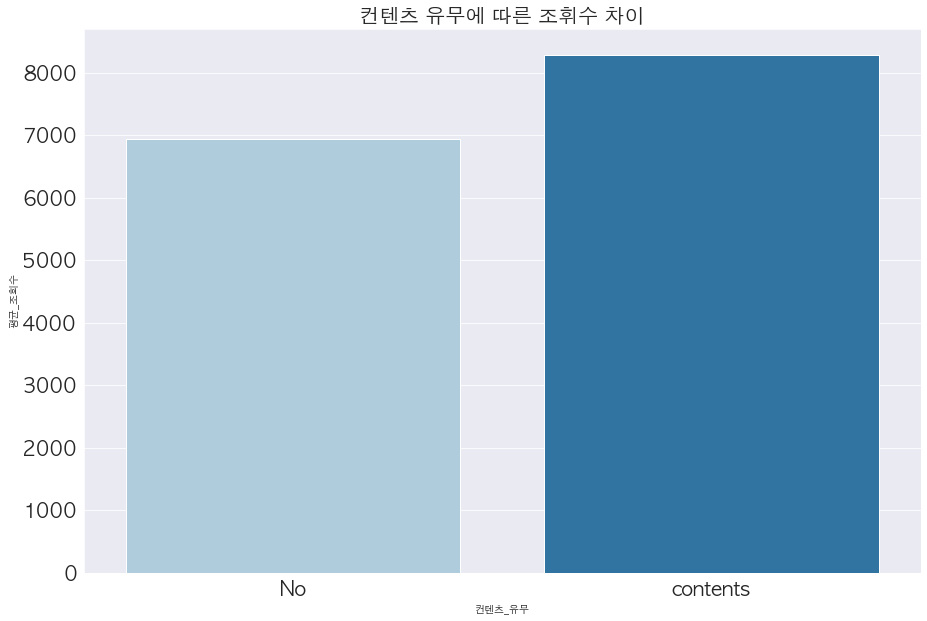

In [222]:
#컨텐츠 유무 시각화
prep_df["contents_group"] = prep_df["contents"].apply(lambda x: "No" if x == "" else "contents")
a = prep_df.groupby("contents_group")["view_count"].agg("mean").reset_index()
a = a.rename({"view_count":"평균_조회수", "contents_group":"컨텐츠_유무"}, axis = 1)

plt.figure(figsize = (15, 10))
plt.title("컨텐츠 유무에 따른 조회수 차이", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.barplot(x = "컨텐츠_유무", y = "평균_조회수", data = a)

In [253]:
prep_df['IsContent'] = np.where(prep_df['contents'] == '', 0, 1)
prep_df['IsContent'].value_counts()

0    360
1    184
Name: IsContent, dtype: int64

In [259]:
prep_df['contents_group'].value_counts()

No          360
contents    184
Name: contents_group, dtype: int64

In [291]:
year_df = prep_df.groupby("year")['view_count','IsContent'].agg(["sum","count"]).reset_index()
year_df.columns = ['year','total_view_ct','aa','IsContent_ct','bb']
year_df.drop(['aa','bb'],axis = 1,inplace = True)
year_df

,year,total_view_ct,IsContent_ct
0,2016,748555,6
1,2017,1205605,64
2,2018,1300950,67
3,2019,595501,40
4,2020,121646,6
5,2021,48737,1


<AxesSubplot:title={'center':'연도별 컨텐츠 횟수'}, xlabel='year', ylabel='IsContent_ct'>

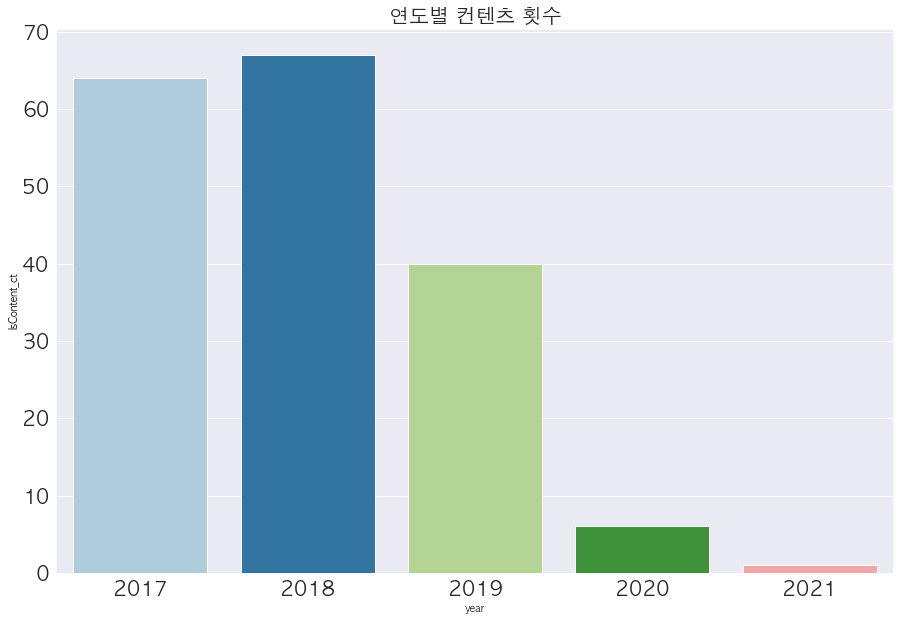

In [301]:
#연도별 컨텐츠 횟수
plt.figure(figsize = (15, 10))
plt.title("연도별 컨텐츠 횟수", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel("컨텐츠 횟수", color = "black")
sns.barplot(data = year_df[year_df['year']!=2016],x = 'year',y = 'IsContent_ct')